In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Database connection parameters
db_config = {
    'user': 'root',
    'password': '4192',
    'host': 'localhost',
    'database': 'carrepairshop'
}

# Establishing the connection
conn = mysql.connector.connect(**db_config)

# Check if the connection is successful
if conn.is_connected():
    print('Connected to MySQL database')
else:
    print('Connection failed')

Connected to MySQL database


In [3]:
# SQL query to get the top 5 customers by total spending
query = """
SELECT c.Name, SUM(i.Total) as TotalSpent
FROM invoice i
JOIN Customer c ON i.CustomerID = c.CustomerID
GROUP BY c.Name
ORDER BY TotalSpent DESC
LIMIT 5;
"""

# Execute the query and load the data into a DataFrame
top_customers = pd.read_sql(query, conn)


C:\Users\Henry Okam\AppData\Local\Temp\ipykernel_36636\2996415257.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_customers = pd.read_sql(query, conn)


In [4]:
top_customers

,Name,TotalSpent
0,Jennifer Robinson,1802.20
1,David Wilson,837.20
2,Emily Brown,664.00
3,Michael Smith,617.25
4,Sarah Johnson,376.00


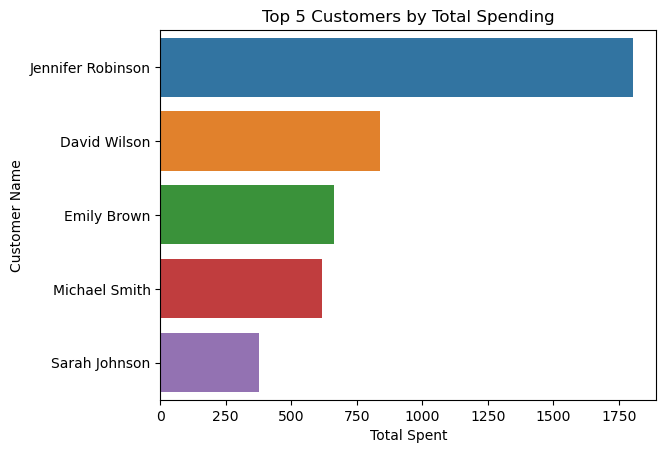

In [5]:
# Create a bar plot
sb.barplot(x='TotalSpent', y='Name', data=top_customers)
plt.title('Top 5 Customers by Total Spending')
plt.xlabel('Total Spent')
plt.ylabel('Customer Name')
plt.show()


In [6]:
#sql query to Determine the average spending of customers on repairs and parts.

query = """
SELECT AVG(Invoice.TotalLabour) AS AvgRepairSpend, AVG(Invoice.TotalParts) AS AvgPartsSpend
FROM Invoice;
"""

# Execute the query and load the data into a DataFrame
avg_spend = pd.read_sql(query, conn)
avg_spend

C:\Users\Henry Okam\AppData\Local\Temp\ipykernel_36636\421967327.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_spend = pd.read_sql(query, conn)


,AvgRepairSpend,AvgPartsSpend
0,378.0,406.974


In [7]:
# Query to  Analyze the distribution of vehicle ages and identify any trends in service requirements based on vehicle age.
query = """
SELECT
    Make, 
    (YEAR(CURDATE()) - Vehicle.Year) AS VehicleAge,
    SUM(Amount) AS AmountSpentOnParts,
    SUM(Quantity) AS QtyParts
FROM parts
JOIN invoice
ON parts.InvoiceID = invoice.InvoiceID
JOIN vehicle
ON invoice.VehicleID = vehicle.VehicleID
GROUP BY Make, VehicleAge
ORDER BY VehicleAge;
"""

# Execute the query and load the data into a DataFrame
vehicle_ages = pd.read_sql(query, conn)
vehicle_ages

C:\Users\Henry Okam\AppData\Local\Temp\ipykernel_36636\1987686581.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vehicle_ages = pd.read_sql(query, conn)


,Make,VehicleAge,AmountSpentOnParts,QtyParts
0,Ford,4,125.00,2.0
1,Honda,6,150.00,2.0
2,Chevrolet,8,140.00,5.0
3,Toyota,9,200.00,1.0
4,BMW,12,969.87,6.0


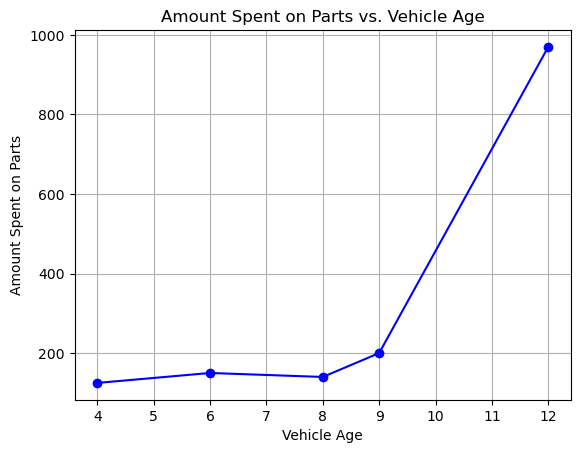

In [8]:
# Create a line plot
plt.plot(vehicle_ages['VehicleAge'], vehicle_ages['AmountSpentOnParts'], marker='o', linestyle='-', color='b')
plt.xlabel('Vehicle Age')
plt.ylabel('Amount Spent on Parts')
plt.title('Amount Spent on Parts vs. Vehicle Age')
plt.grid(True)
plt.show()


In [9]:
# Create query to Calculate the total revenue generated from each type of job.
query = """
SELECT Job.Description, SUM(Job.Amount) AS TotalRevenue
FROM Job
GROUP BY Job.Description
ORDER BY TotalRevenue DESC;
"""
# Execute query and load the data into a dataframe
RevenueByJob = pd.read_sql(query, conn)
RevenueByJob

C:\Users\Henry Okam\AppData\Local\Temp\ipykernel_36636\1537454723.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  RevenueByJob = pd.read_sql(query, conn)


,Description,TotalRevenue
0,Replace front CV Axel,437.5
1,Transmission check,300.0
2,Replace spark plugs,260.0
3,Replace brake pads,250.0
4,Coolant flush,180.0
5,Replace battery,150.0
6,Balance tires,125.0
7,Oil change,75.0
8,Diagnose front wheel vibration,62.5
9,Tire rotation,50.0


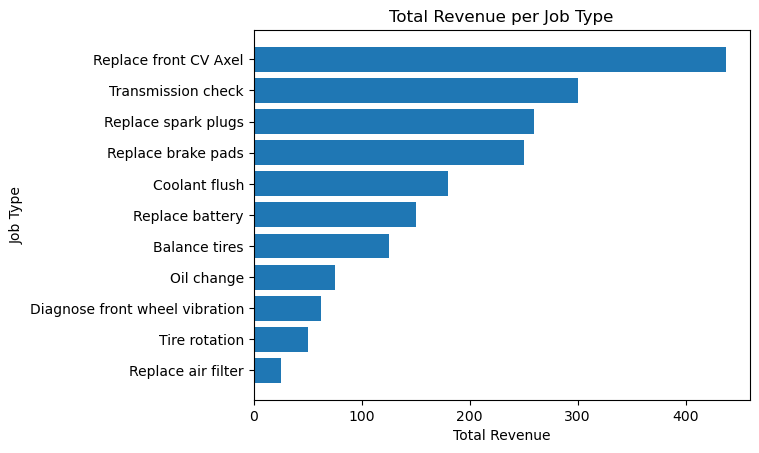

In [10]:
# Sort the DataFrame by total revenue in descending order
RevenueByJob_sorted = RevenueByJob.sort_values(by='TotalRevenue', ascending=True)

# Create a bar chart showing Jobs by Total Revenue
plt.barh(RevenueByJob_sorted['Description'], RevenueByJob_sorted['TotalRevenue'])
plt.title('Total Revenue per Job Type')
plt.xlabel('Total Revenue')
plt.ylabel('Job Type')
#plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [11]:
# Query to Identify the jobs with the highest and lowest average costs.
query = """
SELECT Job.Description, AVG(Job.Amount) AS AverageCost
FROM Job
GROUP BY Job.Description
ORDER BY AverageCost DESC;
"""
# Execute query and load the data into a dataframe
AvgCostJob = pd.read_sql(query, conn)
AvgCostJob

C:\Users\Henry Okam\AppData\Local\Temp\ipykernel_36636\1874218518.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  AvgCostJob = pd.read_sql(query, conn)


,Description,AverageCost
0,Replace front CV Axel,437.5
1,Transmission check,300.0
2,Replace spark plugs,260.0
3,Replace brake pads,250.0
4,Coolant flush,180.0
5,Replace battery,150.0
6,Balance tires,125.0
7,Oil change,75.0
8,Diagnose front wheel vibration,62.5
9,Tire rotation,50.0


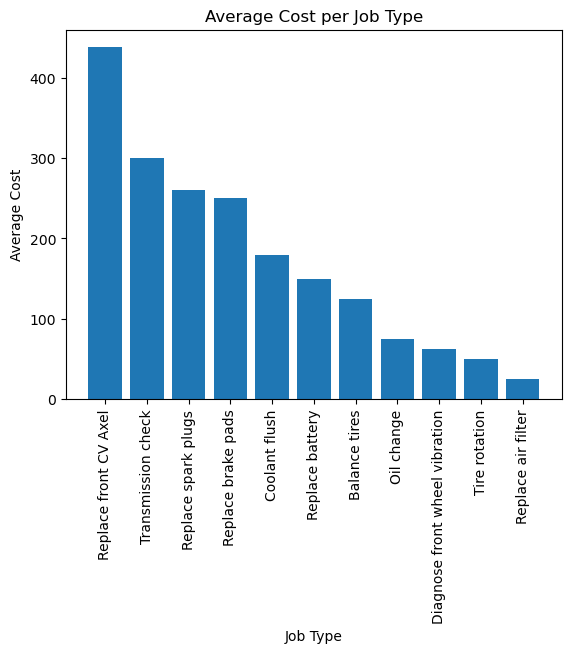

In [12]:
# Sort the DataFrame by avg cost in descending order
AvgCostJob_sorted = AvgCostJob.sort_values(by='AverageCost', ascending=False)

# Create a bar chart showing Jobs by Avg Cost
plt.bar(AvgCostJob_sorted['Description'], AvgCostJob_sorted['AverageCost'])
plt.title('Average Cost per Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [13]:
# Create query to analyze the impact of sales tax on the total revenue.
query = """
SELECT 
    SUM(TotalParts) AS Parts,
    SUM(TotalLabour) AS Labour,
    SUM(SalesTax) AS SalesTax,
    SUM(Total) AS TotalRevenue
FROM Invoice;
"""
PerSalesTax = pd.read_sql(query, conn)
PerSalesTax

C:\Users\Henry Okam\AppData\Local\Temp\ipykernel_36636\2565943033.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  PerSalesTax = pd.read_sql(query, conn)


,Parts,Labour,SalesTax,TotalRevenue
0,2034.87,1890.0,371.78,4296.65


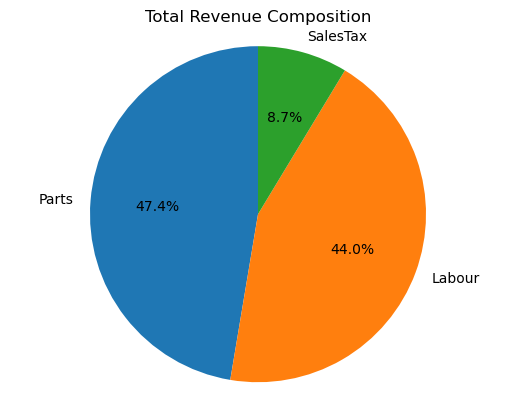

In [14]:
# Create labels for the pie chart
labels = ['Parts', 'Labour', 'SalesTax']

# Create sizes for each component
sizes = [PerSalesTax['Parts'].iloc[0], PerSalesTax['Labour'].iloc[0], PerSalesTax['SalesTax'].iloc[0]]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue Composition')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [15]:
# Craeating a query for the top 5 most frequently used parts and their total usage.
query = """
SELECT Parts.PartName, SUM(Quantity) AS UsageFrequency
FROM Parts
GROUP BY Parts.PartName
ORDER BY UsageFrequency DESC
LIMIT 5;
"""
topParts = pd.read_sql(query, conn)
topParts

C:\Users\Henry Okam\AppData\Local\Temp\ipykernel_36636\3621971465.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  topParts = pd.read_sql(query, conn)


,PartName,UsageFrequency
0,Wheel Weights,4.0
1,Spark Plugs,4.0
2,CV Axel,1.0
3,Shop Materials,1.0
4,Brake Pads,1.0


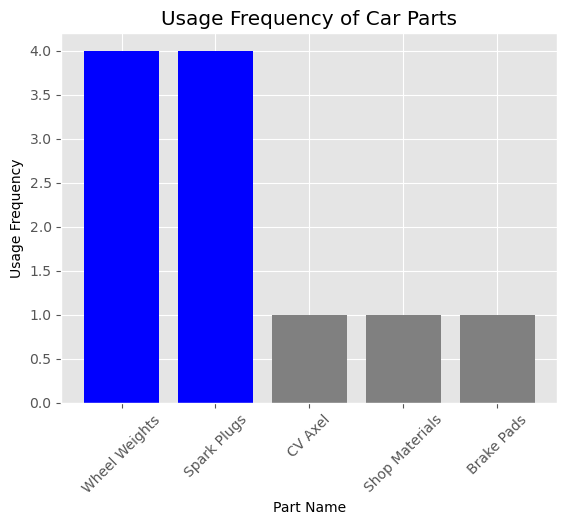

In [19]:
# Set the style (optional)
plt.style.use('ggplot')

# Create the bar plot
plt.bar(topParts['PartName'], topParts['UsageFrequency'], color=['blue', 'blue', 'gray', 'gray', 'gray'])
plt.xlabel('Part Name')
plt.ylabel('Usage Frequency')
plt.title('Usage Frequency of Car Parts')
plt.xticks(rotation=45) 

# Show the plot
plt.show()
